In [2]:
#  -*- coding: utf-8  -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [3]:
train_data = pd.read_csv("../game/train.csv")

/home/severuszhu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


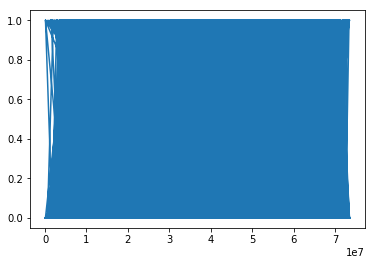

In [6]:
plt.plot(train_data.member_id, train_data.acc_now_delinq)

In [5]:
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

In [4]:
from scipy import stats
from scipy.stats import norm, skew

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

In [8]:
test_data = pd.read_csv("../game/test.csv")
train_data.info()
test_data.info()

In [12]:
print("train_data shape", train_data.shape)
print("test_data shape", test_data.shape)

train_data_ID = train_data["member_id"]
test_data_ID = test_data["member_id"]

print("train_data feature shape", train_data.shape)
print("test_data feature shape", test_data.shape)

train_data shape (709903, 64)
test_data shape (177476, 63)
train_data feature shape (709903, 64)
test_data feature shape (177476, 63)


In [9]:
print(train_data.columns)

data = pd.concat([train_data, test_data], axis = 0)
print(data.isnull().sum()/len(data))

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'earliest_cr_line',
       'mths_since_last_record', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
    

acc_now_delinq                0.200
addr_state                    0.000
all_util                      0.976
annual_inc                    0.000
annual_inc_joint              0.999
application_type              0.000
collection_recovery_fee       0.000
collections_12_mths_ex_med    0.000
desc                          0.858
dti                           0.000
dti_joint                     0.999
earliest_cr_line              0.000
emp_length                    0.051
emp_title                     0.058
funded_amnt                   0.000
funded_amnt_inv               0.000
grade                         0.000
home_ownership                0.000
il_util                       0.979
initial_list_status           0.000
inq_fi                        0.976
inq_last_12m                  0.976
installment                   0.000
int_rate                      0.000
issue_d                       0.000
loan_amnt                     0.000
loan_status                   0.000
max_bal_bc                  

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 0.00 and sigma = 0.07



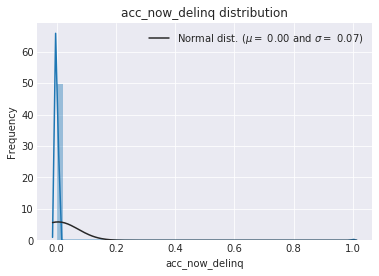

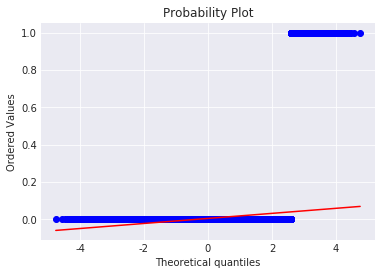

In [10]:
from pylab import mpl 
from scipy.special import boxcox1p
lam = 0.15

mpl.rcParams['axes.unicode_minus'] = False

sns.distplot(train_data['acc_now_delinq'], fit = norm)

(mu, sigma) = norm.fit(train_data['acc_now_delinq'])

print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc = "best")

plt.ylabel("Frequency")
plt.title('acc_now_delinq distribution')

fig = plt.figure()
res = stats.probplot(train_data['acc_now_delinq'], plot = plt)
plt.show()



In [22]:
from scipy.special import boxcox, inv_boxcox

#tmp = stats.boxcox(train_data['acc_now_delinq'])

#print(train_data['acc_now_delinq'])
#print(inv_boxcox(tmp))
#fig = plt.figure()
#fig.set(alpha=0.2)  # 设定图表颜色alpha参数



ValueError: Data must be positive.

In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv("../game/train.csv")
test_data = pd.read_csv("../game/test.csv")
all_data = pd.concat((train_data, test_data)).reset_index(drop = True)
all_data.drop(["acc_now_delinq"], axis = 1, inplace = True)

all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio': all_data_na})

missing_data

/home/severuszhu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


MemoryError: 

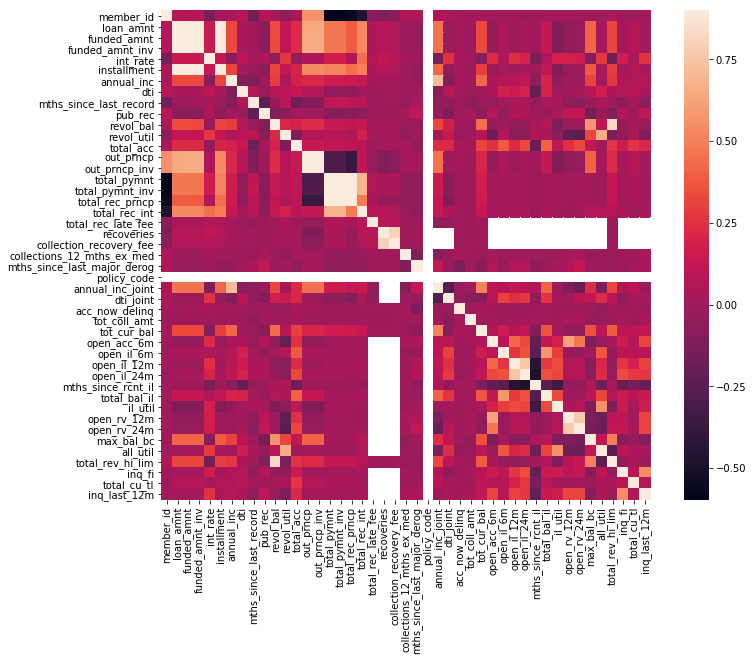

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
corrmat = train_data.corr()
plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax = 0.9, square = True)

In [10]:
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb  # 





In [11]:
n_folds = 5
y_train, lambda_ = stats.boxcox(train_data['acc_now_delinq'])    #  其中一个值为负数，需要进一步处理
#train_data.plot(x = "member_id", y = "collection_recovery_fee")   # 由于用户ID的数量比较多，单纯的使用会导致图中的信息混乱

term_map = {'36 months': 36, '60 months': 60}
grade_map = {'A':1,'B':2,'C':3,'D':4}
sub_grade_map = {'A1': 11, 'A2': 12, 'A3': 13, 'A4': 14,
                 'B1': 21, 'B2': 22, 'B3': 23, 'B4': 24,
                 'C1': 31, 'C2': 32, 'C3': 33, 'C4': 34,
                 'D1': 41, 'D2': 42, 'D3': 43, 'D4': 44,}

emp_length_map = {'n/a': -1,
                  '< 1 year': -1,
                  '1 years':  1,
                  '2 years':  2,
                  '3 years':  3,
                  '4 years':  4,
                  '5 years':  5,
                  '6 years':  6,
                  '7 years':  7,
                  '8 years':  8,
                  '9 years':  9,
                  '10 years': 10,
                  '10 + years': 11
                  }

home_ownership_map = {'MORTGAGE': 1,
                      'RENT': 2,
                      'OWN': 3}

verification_status_map = {'Not Verified': 1,
                           'Source Verified': 2,
                           'Verified': 3}

loan_status_map = {'Late (31-120 days)': -3,
                    'Late (16-30 days)': -2,
                    'n': -1,
                    'Issued': 1,
                    'In Grace Period': 2,
                    'Current': 3,
                    'Charged Off': 4,
                    'Fully Paid': 5}

pymnt_plan_map = {'n': 0, 'y': 1, '??': 3}  # 原始数据中存在一处null， 将其直接按照n处理，在此处进一步更改

initial_util_map = {'f': 1, 'w': 2}

application_type_map = {'INDIVIDUAL': 1,
                        'JOINT': 2}

t_train = train_data.drop(['acc_now_delinq'], axis = 1)
t_train['term'] = t_train['term'].map(term_map)
t_train['grade'] = t_train['grade'].map(grade_map)
t_train['sub_grade'] = t_train['sub_grade'].map(sub_grade_map)
t_train['pymnt_plan'] = t_train['pymnt_plan'].map(pymnt_plan_map)
t_train['emp_length'] = t_train['emp_length'].map(emp_length_map)

t_train = t_train.fillna(0)       # 初步使用，后期： 1. 将数据缺失情况较为严重的feature暂时舍弃，对于其他情况的使用拟合以及拉格朗日插值以及使用其他进行替代

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train_data.values)
    rmse = -cross_val_score(model, t_train.values, y_train, scoring = " neg_mean_squared_error", cv = kf)
    
    print(rmse)
    return rmse
    

ValueError: Data must be positive.

In [12]:
GBoost = GradientBoostingRegressor(n_estimators = 2000, learning_rate = 0.05,  # 将数据进行进一步调整，在使用model时学习调参
                                   max_depth = 8, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10,
                                   loss = 'huber', random_state = 6) 

In [13]:
score = rmsle_cv(GBoost)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


NameError: name 'rmsle_cv' is not defined

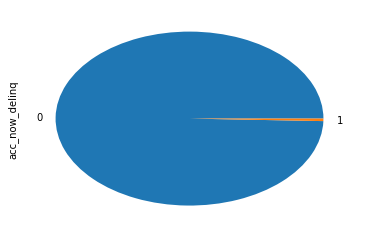

In [16]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import plot
import matplotlib

train_data = 
train_data.acc_now_delinq.value_counts().plot(kind = 'pie')

In [5]:
# 时间格式的转化
import datetime
## 时间格式化及其相关的处理有待讨论



# 对于数据缺失较少，同时上下关联并不紧密的原始数据进行当列的均值填充（原始数据的量在70,000以上）
train_data['annual_inc'].fillna(train_data['annual_inc'].median(axis = 0), inplace = True)
#train_data['earliest_cr_line'].fillna(train_data['earliest_cr_line'].median(axis = 0), inplace = True)
train_data['pub_rec'].fillna(train_data['pub_rec'].median(axis = 0), inplace = True)
train_data['revol_util'].fillna(train_data['revol_util'].median(axis = 0), inplace = True)
train_data['total_acc'].fillna(train_data['total_acc'].median(axis = 0), inplace = True)
train_data['collections_12_mths_ex_med'].fillna(train_data['collections_12_mths_ex_med'].median(axis = 0), inplace = True)


# 对于原始数据量在 60,000 ~ 70,000 之间的缺值数据使用 RandomForset 拟合补全
from sklearn.ensemble import RandomForestRegressor



In [6]:
from sklearn.feature_selection import VarianceThreshold

# 将数据量在10,000以下的feature直接舍弃
train_data = train_data.drop(['annual_inc_joint', 'dti_jiont', 'verification_status_joint'])

# 将数据中主要问字符串叙述的feature暂时舍弃 (文本部分）
train_data = train_data.drop(['emp_title', 'desc', 'purpose', 'title', 'zip_code', 'addr_state'])

# 将数据量为10,000 - 100,000 之间的feature暂时舍弃
train_data = train_data.drop(['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
                              'mths_since_rcnt_il', 'total_bal_il', 'il_util',
                              'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                              'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'])


#方差选择法，返回值为特征选择后的数据
# 参数 threshold为方差的阈值
VarianceThreshold(threshold = 3).fit_transform(train_data)

ValueError: labels ['annual_inc_joint' 'dti_jiont' 'verification_status_joint'] not contained in axis

In [3]:
import pandas as pd
import numpy as np

train_data = pd.read_csv("../game/train.csv")
test_data = pd.read_csv("../game/test.csv")


/home/severuszhu/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
train_data[['addr_state', 'acc_now_delinq']].groupby(['addr_state'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,addr_state,acc_now_delinq
28,ND,0.010000
29,NE,0.007543
50,WY,0.007449
46,VT,0.006959
39,RI,0.006785
49,WV,0.006588
6,CT,0.006261
31,NJ,0.006207
25,MS,0.006175
15,IN,0.005800


In [7]:
train_data[['title', 'acc_now_delinq']].groupby(['title'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,title,acc_now_delinq
15992,Express loan,1.0
15319,END,1.0
8332,Consolidating Remaining Debt,1.0
45588,gettin rid of it,1.0
27716,MyLoan1,1.0
34166,Reduce Visa,1.0
19089,Goodbye 27%,1.0
13031,Debt Control Now,1.0
43969,debt consolidation plan,1.0
34226,Reducing credit card interest rates,1.0


In [8]:
train_data[['desc', 'acc_now_delinq']].groupby(['desc'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,desc,acc_now_delinq
13450,Borrower added on 02/07/14 > Business payrol...,1.0
57082,Borrower added on 08/08/13 > Consolidate sev...,1.0
10053,Borrower added on 01/28/13 > My loan is to c...,1.0
25572,Borrower added on 03/15/14 > Our outside hea...,1.0
70449,Borrower added on 10/02/13 > I am consolidat...,1.0
28029,Borrower added on 03/26/13 > Pay off existin...,1.0
71108,Borrower added on 10/04/13 > Help pay my tax...,1.0
21226,"Borrower added on 03/03/13 > Late last year,...",1.0
91131,Borrower added on 12/22/13 > credit card and...,1.0
54537,Borrower added on 07/29/13 > Debt payoff<br>,1.0


In [10]:
train_data[['title', 'acc_now_delinq']].groupby(['title'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,title,acc_now_delinq
15992,Express loan,1.0
15319,END,1.0
8332,Consolidating Remaining Debt,1.0
45588,gettin rid of it,1.0
27716,MyLoan1,1.0
34166,Reduce Visa,1.0
19089,Goodbye 27%,1.0
13031,Debt Control Now,1.0
43969,debt consolidation plan,1.0
34226,Reducing credit card interest rates,1.0


In [11]:
train_data[['zip_code', 'acc_now_delinq']].groupby(['zip_code'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,zip_code,acc_now_delinq
801,861xx,0.250000
35,043xx,0.076923
645,690xx,0.062500
81,090xx,0.058824
14,022xx,0.050000
545,584xx,0.047619
813,879xx,0.045455
238,252xx,0.041667
892,963xx,0.040000
773,828xx,0.037500


In [12]:
train_data[['pymnt_plan', 'acc_now_delinq']].groupby(['pymnt_plan'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,pymnt_plan,acc_now_delinq
0,n,0.004639
1,y,0.000000


In [13]:
train_data[['application_type', 'acc_now_delinq']].groupby(['application_type'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,application_type,acc_now_delinq
0,INDIVIDUAL,0.004640
1,JOINT,0.002439


In [17]:
train_data[['home_ownership', 'acc_now_delinq']].groupby(['home_ownership'], as_index = False).mean().sort_values(by = 'acc_now_delinq', ascending = False)

,home_ownership,acc_now_delinq
1,MORTGAGE,0.005763
4,OWN,0.004992
5,RENT,0.003155
0,ANY,0.000000
2,NONE,0.000000
3,OTHER,0.000000


In [20]:
train_data[['verification_status', 'acc_now_delinq']].groupby(['verification_status'], as_index = False).mean().sort_values(by = 'acc_now_delinq',
                                                                                                                            ascending=False)

,verification_status,acc_now_delinq
1,Source Verified,0.005330
2,Verified,0.005286
0,Not Verified,0.003078


In [22]:
train_data[['loan_status', 'acc_now_delinq']].groupby(['loan_status'], 
                                                              as_index = False).mean().sort_values(by = 'acc_now_delinq',
                                                                                                                            ascending=False)

,loan_status,acc_now_delinq
8,Late (16-30 days),0.008990
9,Late (31-120 days),0.008609
1,Current,0.005274
2,Default,0.005219
6,In Grace Period,0.004953
7,Issued,0.004748
0,Charged Off,0.003594
5,Fully Paid,0.002783
4,Does not meet the credit policy. Status:Fully ...,0.001873
3,Does not meet the credit policy. Status:Charge...,0.000000


In [23]:
train_data[['initial_list_status', 'acc_now_delinq']].groupby(['initial_list_status'], 
                                                              as_index = False).mean().sort_values(by = 'acc_now_delinq',
                                                                                                                            ascending=False)

,initial_list_status,acc_now_delinq
1,w,0.004906
0,f,0.004387


In [1]:
from genfeature import *
import pandas as pd
import numpy as np

train_data = pd.read_csv("../game/train.csv")
test_data = pd.read_csv("../game/test.csv")

G:\Anaconda\envs\py3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
G:\Anaconda\envs\py3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


G:\Anaconda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2802: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


drop finished


map finished


fillna finished
train_data cast finished
test_data cast finished


G:\Anaconda\envs\py3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
from genfeature import *
X_train = train_data.drop(['acc_now_delinq'], axis = 1)
Y_train = train_data['acc_now_delinq']
X_test = test_data

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print("LogisticRegression finished")


# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print("SCV finished")


#  k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print("KNeighborsClassifier finished")

# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print("GaussianNB finished")

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print("LinearSVC finished")

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
print("SGDClassifier finished")

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("DecisionTreeClassifier finished")

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("RandomForestClassifier finished")

models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [linear_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
print(models.sort_values(by='Score', ascending=False))

LogisticRegression finished


In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

forest = RandomForestClassifier(max_features='sqrt')
parameter_grid = {
                 'max_depth' : [4,5,6,7,8],
                 'n_estimators': [100,200,250,500],
                 'criterion': ['gini','entropy']
                 }
cross_validation = StratifiedKFold(Y_train, n_folds=5)
grid_search = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(X_train, Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))